<a href="https://colab.research.google.com/github/sravanreddy6745/Mini-Project/blob/master/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.getcwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [4]:
os.getcwd()

'/gdrive'

In [17]:
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/train.p",mode='rb') as training_data:
  train=pickle.load(training_data)
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/test.p",mode='rb') as test_data:
  test=pickle.load(test_data)
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/valid.p",mode='rb') as validation_data:
  validation=pickle.load(validation_data)

In [18]:
X_train,y_train=train['features'],train['labels']

In [19]:
X_train.shape

(34799, 32, 32, 3)

In [20]:
y_train.shape

(34799,)

In [21]:
X_valid,y_valid=validation['features'],validation['labels']

In [22]:
X_test,y_test=test['features'],test['labels']

In [23]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [24]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

Image Visualisation


10

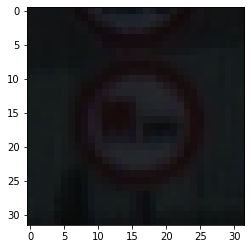

In [32]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

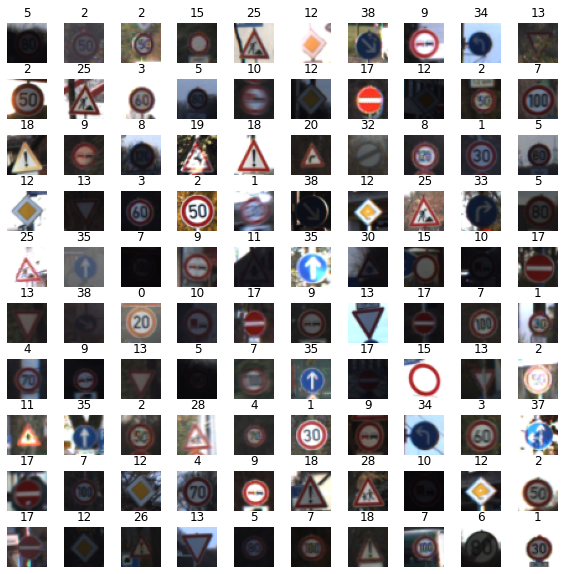

In [36]:
width=10
length=10
fig,axes=plt.subplots(length,width,figsize=(10,10))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,width*length):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)


In [37]:
from sklearn.utils import shuffle

In [38]:
X_train,y_train=shuffle(X_train,y_train)

In [39]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)

In [40]:
X_train_gray.shape

(34799, 32, 32, 1)

In [41]:
X_train_norm=(X_train_gray-128)/128

In [43]:
X_train_norm

array([[[[-0.85677083],
         [-0.84635417],
         [-0.84635417],
         ...,
         [-0.77604167],
         [-0.83333333],
         [-0.86197917]],

        [[-0.86197917],
         [-0.84114583],
         [-0.84114583],
         ...,
         [-0.77083333],
         [-0.8359375 ],
         [-0.86458333]],

        [[-0.86197917],
         [-0.8515625 ],
         [-0.84895833],
         ...,
         [-0.77604167],
         [-0.8359375 ],
         [-0.86458333]],

        ...,

        [[-0.85677083],
         [-0.86458333],
         [-0.85677083],
         ...,
         [-0.8671875 ],
         [-0.86458333],
         [-0.84114583]],

        [[-0.86197917],
         [-0.85677083],
         [-0.84895833],
         ...,
         [-0.8671875 ],
         [-0.86458333],
         [-0.84114583]],

        [[-0.859375  ],
         [-0.859375  ],
         [-0.859375  ],
         ...,
         [-0.828125  ],
         [-0.85677083],
         [-0.85677083]]],


       [[[ 0.94010417],


In [44]:
X_test,y_test=shuffle(X_test,y_test)

In [48]:
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_test_gray.shape

(12630, 32, 32, 1)

In [49]:
X_test_norm=(X_test_gray-128)/128

In [51]:
X_test_norm

array([[[[-0.88541667],
         [-0.87760417],
         [-0.88020833],
         ...,
         [-0.83072917],
         [-0.8046875 ],
         [-0.85416667]],

        [[-0.88541667],
         [-0.88541667],
         [-0.8828125 ],
         ...,
         [-0.796875  ],
         [-0.8125    ],
         [-0.85416667]],

        [[-0.88802083],
         [-0.88802083],
         [-0.88020833],
         ...,
         [-0.83072917],
         [-0.8125    ],
         [-0.796875  ]],

        ...,

        [[-0.8984375 ],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90625   ]],

        [[-0.90104167],
         [-0.91145833],
         [-0.90364583],
         ...,
         [-0.90364583],
         [-0.90885417],
         [-0.90364583]],

        [[-0.90364583],
         [-0.90364583],
         [-0.90885417],
         ...,
         [-0.90104167],
         [-0.91145833],
         [-0.91145833]]],


       [[[-0.6640625 ],


In [52]:
X_valid,y_valid=shuffle(X_valid,y_valid)

In [53]:
X_valid_gray=np.sum(X_valid/3,axis=3,keepdims=True)

In [54]:
X_valid_norm=(X_valid_gray-128)/128

In [55]:
X_valid_gray.shape

(4410, 32, 32, 1)

In [56]:
X_valid_norm

array([[[[-0.91666667],
         [-0.91145833],
         [-0.8984375 ],
         ...,
         [-0.8984375 ],
         [-0.890625  ],
         [-0.90625   ]],

        [[-0.91666667],
         [-0.91145833],
         [-0.8984375 ],
         ...,
         [-0.90625   ],
         [-0.90104167],
         [-0.890625  ]],

        [[-0.9140625 ],
         [-0.91145833],
         [-0.90625   ],
         ...,
         [-0.90364583],
         [-0.90104167],
         [-0.90364583]],

        ...,

        [[-0.91927083],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90885417],
         [-0.90885417],
         [-0.92447917]],

        [[-0.91927083],
         [-0.90104167],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.9140625 ]],

        [[-0.91927083],
         [-0.91927083],
         [-0.91145833],
         ...,
         [-0.90625   ],
         [-0.9140625 ],
         [-0.9140625 ]]],


       [[[ 0.9921875 ],


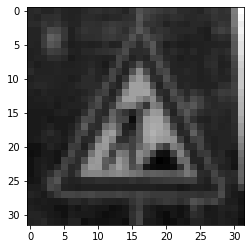

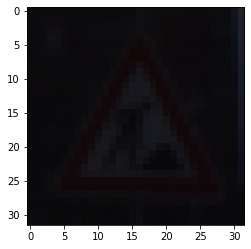

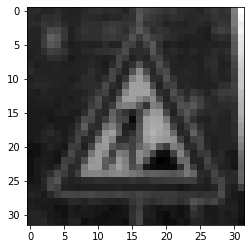

In [58]:
i=np.random.randint(1,len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_norm[i].squeeze(),cmap='gray')
#plt.figure()